# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

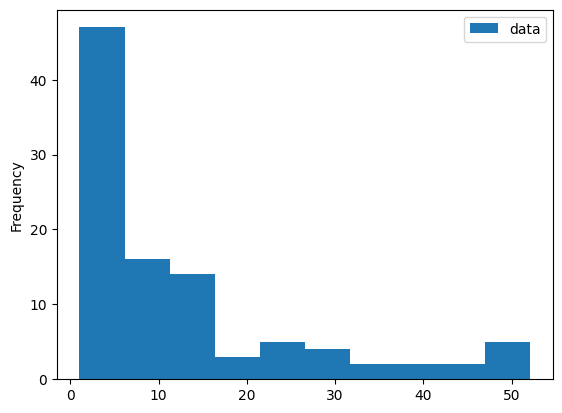

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

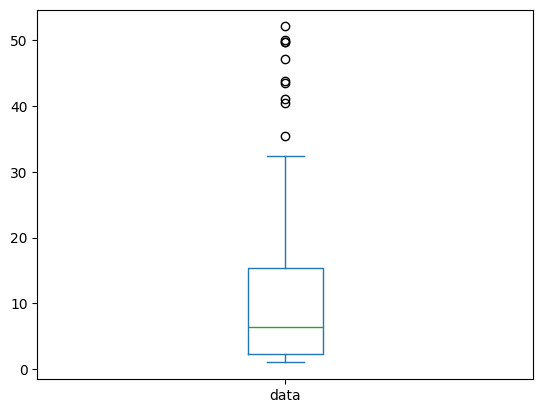

In [4]:
df.plot.box()

When looking at the two charts, I find the histogram provides a better understanding of the data since we can get a better idea of the trend and if there is a lot of skewness. The histogram shows the larger spike at the start from 0 to 5, and we can see how quickly the prices decrease after that range. The box plot, however, does a better job at showing the outliers of the data and how many there are since they each are represented by a singular point. We also can quickly identify where the median of the data is as well as the 25th and 75th percentiles are with the box plot. Both of these charts could use more labeling on the x-axis and the y-axis as well as use chart titles. This is because the audience will not know what the charts are representing without the labels since they may not receive the explanation beforehand like I did. Furthermore, I find that histograms are a little more understandable when the bars are outlined so you can see where each one starts and ends incase they have similar frequencies. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

This week I will be performing Univariate Analysis on two of the three datasets I am planning on working with. One of the datasets I will be using I have to perform joining and feature engineering on and the other I will be performing some column removal for unnecessary columns before proceeding with the univariate analysis.

# Dataset 1: United States E-Commerce Dataset

This is the dataset I used in Week 2. I need to perform some column removals as some of the columns are not needed for machine learning. Once I complete that, I will be able to perform my univariate analysis on this dataset.

In [5]:
ecom_data = pd.read_csv('/workspaces/DX699---HW-Assignments/data.csv', encoding = 'windows-1252')

ecom_data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1/1/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,1/1/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,1/1/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,1/1/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,1/1/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [6]:
ecom_data = ecom_data.drop(columns = ['Row ID', 'Country', 'Postal Code', 'Product Name'])

ecom_data.head()

,Order Date,Order ID,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1/1/2020,CA-2017-107503,Standard Class,GA-14725,Consumer,Lorain,Ohio,East,FUR-FU-10003878,Furniture,Furnishings,48.896,4,0.2,8.5568
1,1/1/2020,CA-2017-144463,Standard Class,SC-20725,Consumer,Los Angeles,California,West,FUR-FU-10001215,Furniture,Furnishings,474.430,11,0.0,199.2606
2,1/1/2020,CA-2017-154466,First Class,DP-13390,Home Office,Franklin,Wisconsin,Central,OFF-BI-10002012,Office Supplies,Binders,3.600,2,0.0,1.7280
3,1/1/2020,CA-2017-151750,Standard Class,JM-15250,Consumer,Huntsville,Texas,Central,OFF-ST-10002743,Office Supplies,Storage,454.560,5,0.2,-107.9580
4,1/1/2020,CA-2017-151750,Standard Class,JM-15250,Consumer,Huntsville,Texas,Central,FUR-FU-10002116,Furniture,Furnishings,141.420,5,0.6,-187.3815


To start, I dropped the Row ID, Country, Postal Code and Product Name columns. This is due to the columns not having much of an effect on modeling. I kept the customer ID and order ID as I could use this dataset to create more features of how frequently an item is ordered by a customer and could potentially predict the likelihood of a customer purchasing an item again. For now, I will not one hot encode my categorical features and will use a bar chart to see the counts of each value in the columns.

The first thing I am going to do for my univariate analysis is to create historgrams for all of the numerical features in the dataframe.

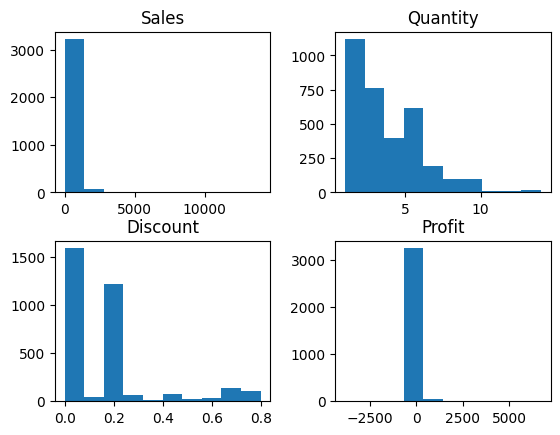

In [7]:
import matplotlib.pyplot as plt

ecom_data.hist(grid = False)
plt.show()

Looking at this, all the numerical features are heavily scewed. Due to this, I will look into scaling each of these features to see if I can normalize them more to prevent any bias in future models.

I will now look into the Mean, Median and Mode for the numerical columns in this dataframe as well.

In [8]:
ecom_numerical_columns = ecom_data.select_dtypes(include = 'number').columns

info = pd.DataFrame({'Mean':ecom_data[ecom_numerical_columns].mean(), 'Median':ecom_data[ecom_numerical_columns].median(), 'Mode' : ecom_data[ecom_numerical_columns].mode().iloc[0]})

info

,Mean,Median,Mode
Sales,221.381418,53.8100,12.96
Quantity,3.766908,3.0000,2.00
Discount,0.156467,0.2000,0.00
Profit,28.212340,8.2968,0.00


Looking at this information, it seems like out of all of the numerical columns, sales and profit have a very heavy right skew as the mean is much larger than the median. This indicates a skew to me as outliers have a bigger effect on the mean and can skew it if they are very large or small. I would not normalize Profit as that is my target value, but I will normalize Sales for now, and may consider normalizing the other two columns to see if it can improve how my model performs if it is not performing well.

The next graphs I will be making are the kernel density estimate graphs. These will help me have an even better understanding of how the numerical values are distributed and how large of a skew they have.

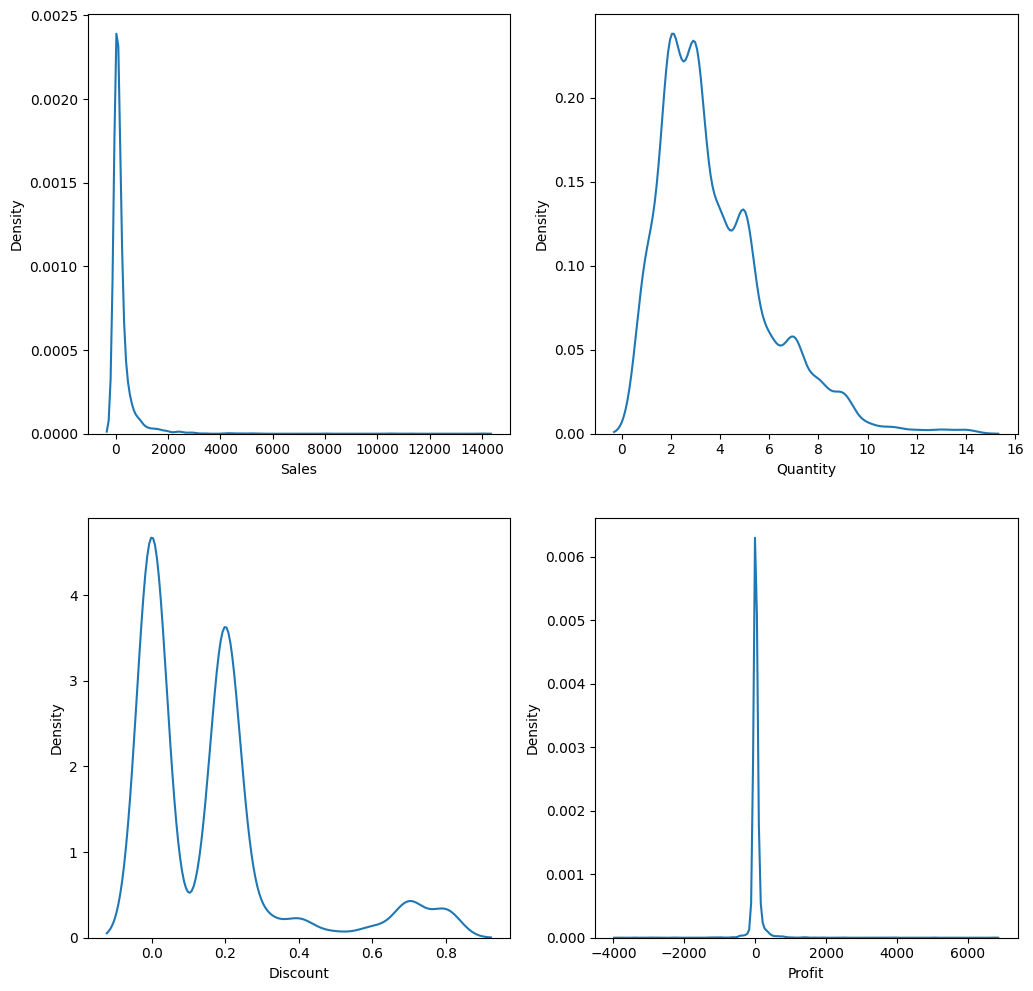

In [9]:
import seaborn as sns

plt.figure(figsize = (12, 12))

for i in range(len(ecom_numerical_columns)):
    plt.subplot(2, 2, (i+1))
    sns.kdeplot(ecom_data[ecom_numerical_columns[i]])

Looking at these charts, I can definitely see that Sales has a large right tailed skew since it has one large peak at the beginning and then goes into a massive decrease with a long tail. Furthermore, Quantity and Discount do have a slight skew but are not nearly as large as the skew on the sales graph. The Sales column most likely has a large skew due to very few customers making large purchases while majority of the cusotmers make smaller purchases between $50-$100. I will also be creating a boxplot for the sales to see how many outliers are within this column.

<Axes: ylabel='Sales'>

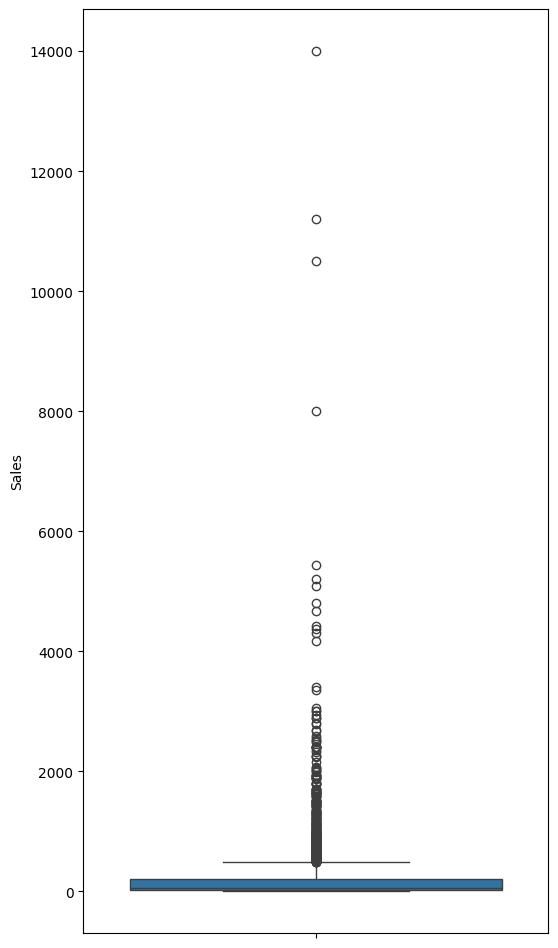

In [10]:
plt.figure(figsize = (6, 12))

sns.boxplot(ecom_data['Sales'])

Looking at this boxplot, it is very apparent that this column has a decent amount of outliers, specifically around $1000 range of the graph. After looking at the different metrics and graphs to investigate the distribution, I will be using a scaler to attempt to normalize this column. This will help prevent bias within our machine learning model when it is trained with this data.

The last thing I will be looking into for this dataset for now is the bar plot distributions for the categorical columns that do not have over 50 values. This is due to the columns with higher value counts do not provide a good graph as the X-axis becomes unlegible due to the high count. I will make a graph for the columns that have over 50 values with the top 50 instead to still get an understanding of the distribution of these columns.

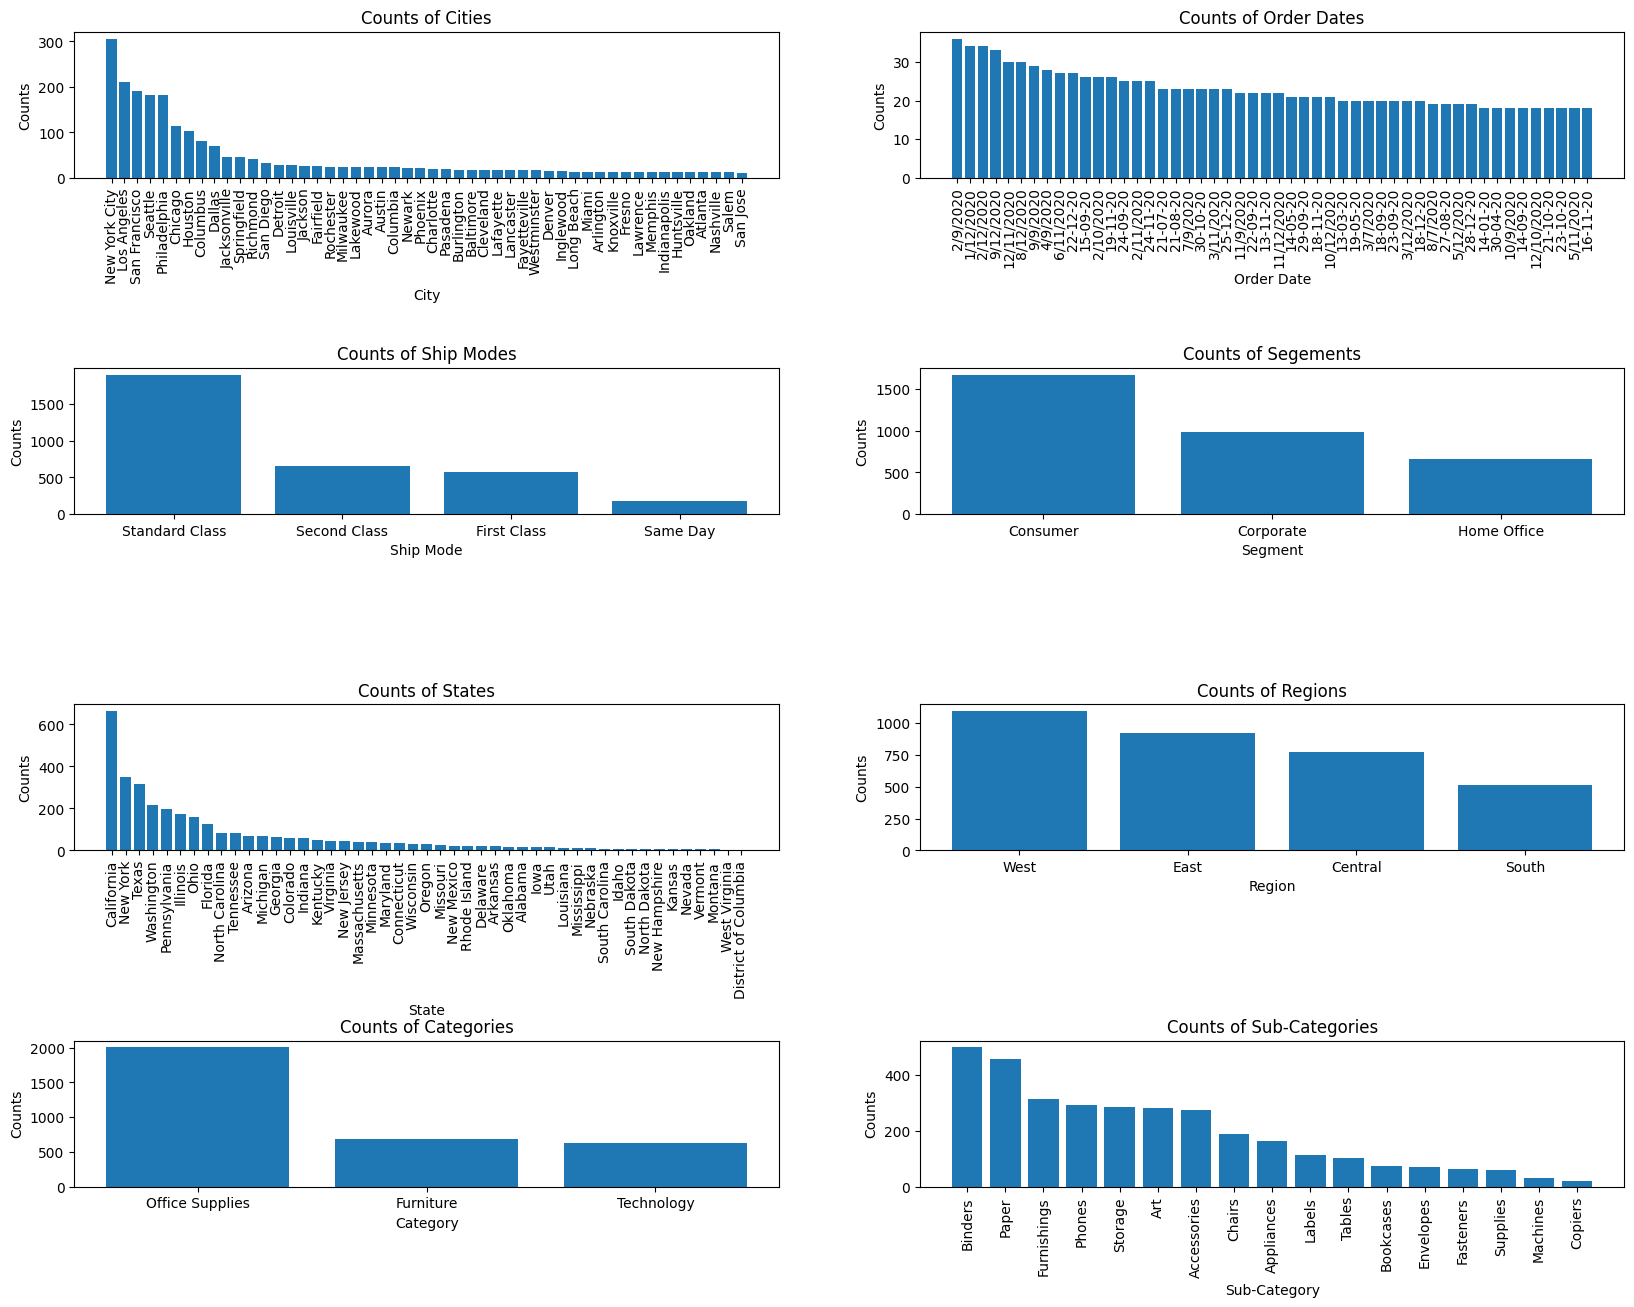

In [11]:
plt.figure(figsize = (20, 15))

plt.subplot(4, 2, 1)
plt.bar(ecom_data['City'].value_counts()[:50].index.tolist(), sorted(ecom_data['City'].value_counts(), reverse = True)[:50])
plt.xticks(rotation = 'vertical')
plt.xlabel('City')
plt.ylabel('Counts')
plt.title('Counts of Cities')

plt.subplot(4, 2, 2)
plt.bar(ecom_data['Order Date'].value_counts()[:50].index.tolist(), sorted(ecom_data['Order Date'].value_counts(), reverse = True)[:50])
plt.xticks(rotation = 'vertical')
plt.xlabel('Order Date')
plt.ylabel('Counts')
plt.title('Counts of Order Dates')

plt.subplot(4, 2, 3)
plt.bar(ecom_data['Ship Mode'].value_counts().index.tolist(), ecom_data['Ship Mode'].value_counts())
plt.xlabel('Ship Mode')
plt.ylabel('Counts')
plt.title('Counts of Ship Modes')

plt.subplot(4, 2, 4)
plt.bar(ecom_data['Segment'].value_counts().index.tolist(), ecom_data['Segment'].value_counts())
plt.xlabel('Segment')
plt.ylabel('Counts')
plt.title('Counts of Segements')

plt.subplot(4, 2, 5)
plt.bar(ecom_data['State'].value_counts().index.tolist(), ecom_data['State'].value_counts())
plt.xticks(rotation = 'vertical')
plt.xlabel('State')
plt.ylabel('Counts')
plt.title('Counts of States')

plt.subplot(4, 2, 6)
plt.bar(ecom_data['Region'].value_counts().index.tolist(), ecom_data['Region'].value_counts())
plt.xlabel('Region')
plt.ylabel('Counts')
plt.title('Counts of Regions')

plt.subplot(4, 2, 7)
plt.bar(ecom_data['Category'].value_counts().index.tolist(), ecom_data['Category'].value_counts())
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Counts of Categories')

plt.subplot(4, 2, 8)
plt.bar(ecom_data['Sub-Category'].value_counts().index.tolist(), ecom_data['Sub-Category'].value_counts())
plt.xticks(rotation = 'vertical')
plt.xlabel('Sub-Category')
plt.ylabel('Counts')
plt.title('Counts of Sub-Categories')

plt.subplots_adjust(hspace = 1.3)
plt.show()

Looking at these bar charts, I am noticing a lot of trends. To start, California has the highest amount of orders with New York being the second highest, but it is a steep decrease between the two. Furthermore, office supplies seem to be the biggest seller for this company. Customers also prefer standard shipping most of the time and a lot of the customers are consumers. I am curious to see if different segment types have different preferences on shipping modes. I am also learning that the order date column has different formatting for dates so I will have to look into properly formatting the dates as well.

In [12]:
shipping_df = pd.DataFrame({'Segment':ecom_data['Segment'], 'Ship Mode':ecom_data['Ship Mode']})

shipping_counts = shipping_df.groupby('Segment')['Ship Mode'].value_counts()

shipping_counts

Segment      Ship Mode     
Consumer     Standard Class    958
             Second Class      349
             First Class       270
             Same Day           91
Corporate    Standard Class    562
             Second Class      197
             First Class       175
             Same Day           46
Home Office  Standard Class    377
             First Class       127
             Second Class      111
             Same Day           49
Name: count, dtype: int64

I was expecting that the corporate segments may use faster shipping modes to receive supplies but after looking at this table I have learned that all three segments have a similar usage of each shipping method.

## Conclusions

Overall, this data is usable for machine learning and predicting multiple things. I can use a regression model to predict the profit of each order, and I can also potentially create a system that can predict whether someone will purchase a product based on past orders. Furthermore, I will need to perform one hot encoding on categorical columns to ensure the data can be used in a regression based model. I also will need to scale the sales column as well as the encoded columns as most of them have a right tail skew with one value having the majority of orders and the rest have very few.

# Dataset 2: Instacart Market Basket Analysis

This is the second dataset I will be performing Univariate Analysis on. I will be looking into seeing if I can use a different software to continue working with this dataset as one of the necessary files I need is larger than the allowed file limit on Github. For the time being, I have uploaded 2 of the 3 files and will begin joining them and looking into some of the information about the dataset.

In [13]:
prior = pd.read_csv('/workspaces/DX699---HW-Assignments/Prior_Orders.csv', encoding = 'windows-1252')

prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
product = pd.read_csv('/workspaces/DX699---HW-Assignments/Products.csv', encoding = 'utf-8')

product = product.set_index('product_id')

product.head()

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13


In [15]:
prior = prior.join(product, on = 'product_id', how = 'inner')

prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


Now that I have my two dataframes joined, I will look into the distribution of the reordered column to see if things are more often reordered or not reordered. 

If I could add the orders file to github, I would have joined it to this dataframe as well and began looking into different features I could create like number of times ordered, how many orders they have placed in total and the frequency of ordering for each item per customer.

Text(0, 0.5, 'Frequency')

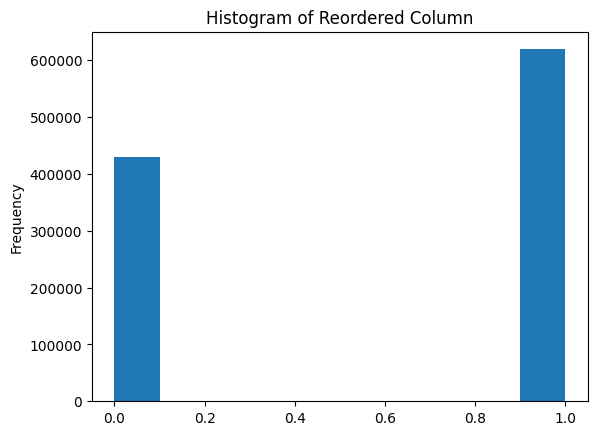

In [16]:
prior['reordered'].hist(grid = False)
plt.title('Histogram of Reordered Column')
plt.ylabel('Frequency')


Looking at this histogram it is clear that overall there isn't a huge skew on whether an item is reordered or not. I will also be looking at the top 50 most ordered products from the store using a bar chart. This is to see if there is any noticeable trends amongst the food items.

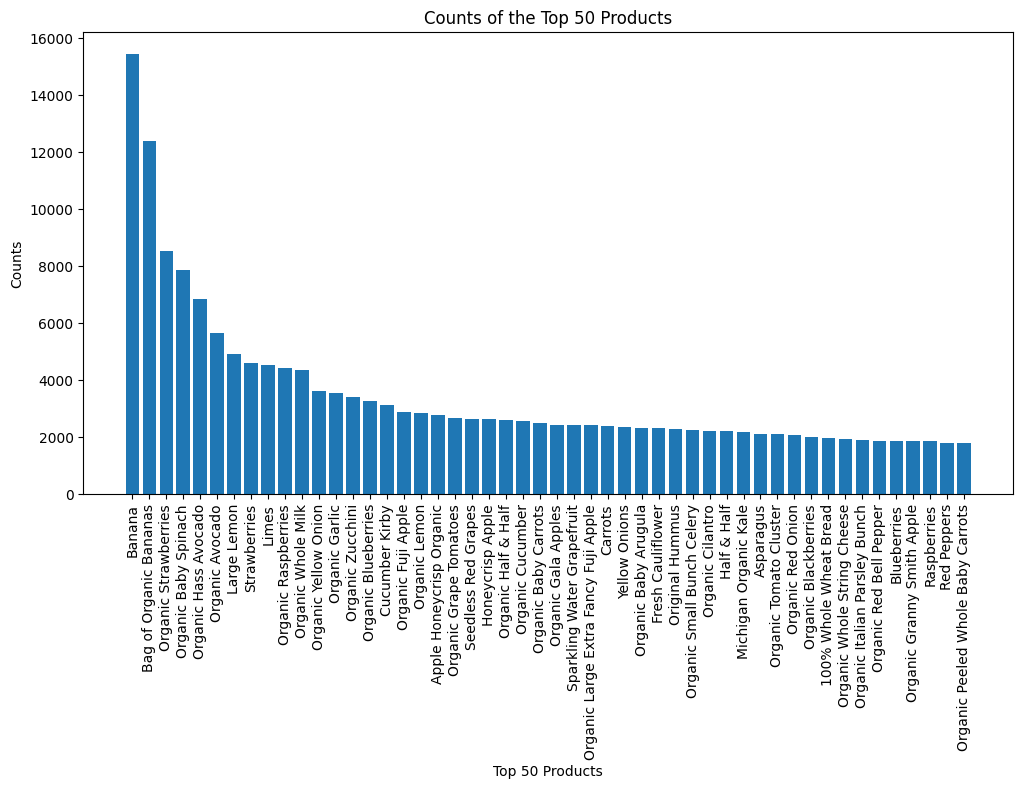

In [23]:
plt.figure(figsize = (12, 6))

plt.bar(prior['product_name'].value_counts().index.tolist()[:50], prior['product_name'].value_counts()[:50])
plt.xticks(rotation = 'vertical')
plt.xlabel('Top 50 Products')
plt.ylabel('Counts')
plt.title('Counts of the Top 50 Products')

plt.show()

Looking at this chart, almost all of the products are produce with a couple of exceptions. I also find it very interesting that the top two products are both bananas. It makes me curious if this is a normal occurence at all Market Baskets or if this specific location sells more bananas than others. It does make sense that the top 50 products sold are almost all produce since it is a grocery store and people are usually purchasing a lot more produce than other items. I did expect there to be some form of meat on this list like steak or a fish of some sort.

## Conclusions

Unfortunately due to the file size limits on Github, I was unable to properly perform univariate analyis on this dataset. Once I figure out if I can use a different software to continue with it, I will finish the analysis. However, from the bit of analysis I have conducted so far with this data, I believe it will be a good dataset for machine learning and predicting whether a customer will reorder a certain item based on old patterns.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

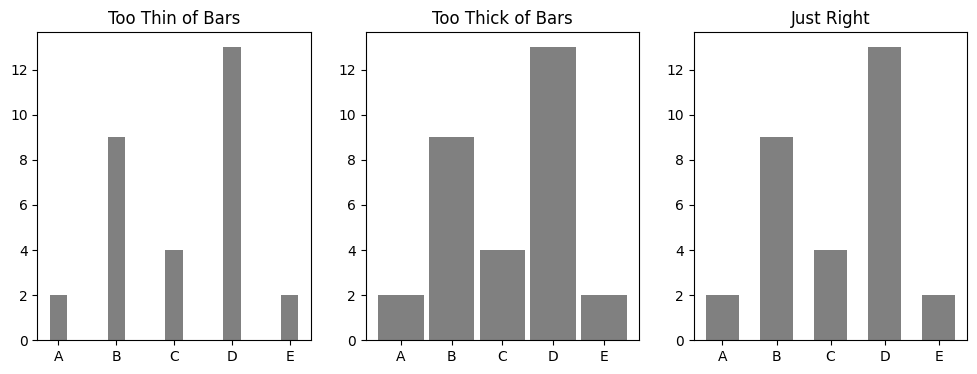

In [61]:
import random

choices = ['A', 'B', 'C', 'D', 'E']
weights = [0.1, 0.4, 0.2, 0.2,0.1]

df = pd.DataFrame({'Samples': random.choices(population = choices, weights = weights, k = 30)})

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.bar(sorted(df['Samples'].value_counts().index.tolist()), df['Samples'].value_counts().sort_index(), width = 0.3, color = 'gray')
plt.title('Too Thin of Bars')

plt.subplot(1, 3, 2)
plt.bar(sorted(df['Samples'].value_counts().index.tolist()), df['Samples'].value_counts().sort_index(), width = 0.9, color = 'gray')
plt.title('Too Thick of Bars')

plt.subplot(1, 3, 3)
plt.bar(sorted(df['Samples'].value_counts().index.tolist()), df['Samples'].value_counts().sort_index(), width = 0.6, color = 'gray')
plt.title('Just Right')

plt.show()